In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [115]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [116]:
sample_data = data['text']

In [117]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [118]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [119]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.13655065 -0.0399174   0.04716691  0.02980346  0.04930928  0.14420971
  0.14485706  0.07554126 -0.0286772  -0.0843377  -0.06154918  0.03941782
  0.03573918  0.03790623  0.07098873  0.05063662  0.10837547 -0.0295947
 -0.09218056 -0.1195287 ]
[('1030', 0.9786726832389832), ('345', 0.8369751572608948), ('1107', 0.8194485306739807), ('8369', 0.7857539057731628), ('7091', 0.7850133180618286), ('8342', 0.7790846824645996), ('355', 0.7785695791244507), ('6619', 0.7784685492515564), ('3656', 0.769137442111969), ('7581', 0.7659317851066589)]
[ 3.5452027 -0.2577589 -2.0057914 -5.581509  -6.96467    6.918571
  3.5769267  5.382051  -2.1600354 -1.0977162 -2.1880546 -6.8639746
  4.389982  -2.23606    7.144437   1.9807225 -2.1880245 -2.708872
  4.0604653 -5.1897693]


In [120]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [121]:
list(doc_vectors.values())[0]

array([ 0.92243785,  0.050346  ,  0.08228257,  0.21838379, -0.3503509 ,
        0.697324  ,  0.33349788,  0.5166501 , -0.2914144 , -0.4195879 ,
       -0.397612  , -0.02124719,  0.8313234 ,  0.6565801 ,  0.63319016,
        0.34202597,  0.73057705, -0.24135326, -0.5001526 , -0.38457984],
      dtype=float32)

In [36]:
#perform k-means clustering on embedded documents

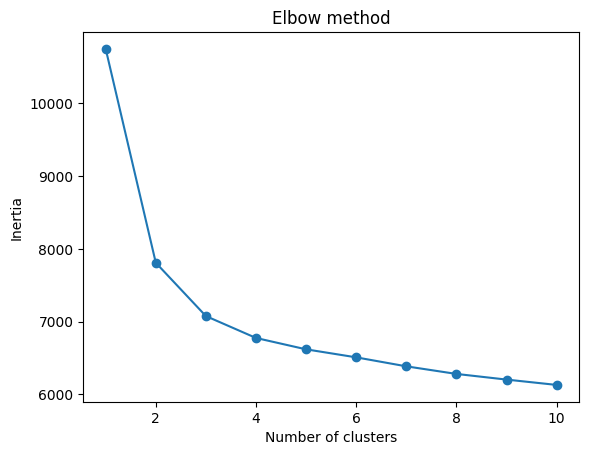

In [122]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [123]:
num_clusters = 3

In [124]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [125]:
labeled_data = zip(sample_data,kmeans.labels_)

In [57]:
#find centroids. compute bigram closest to centroid

In [126]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 6.64874656e-01,  8.30546291e-02,  3.35156789e-02,
         3.59028093e-01, -1.56735938e-01,  5.85182417e-01,
         3.63047739e-01,  3.45095164e-01, -3.05649210e-01,
        -3.87064206e-01, -1.78866164e-01,  4.59730515e-02,
         6.26287813e-01,  3.22685665e-01,  5.22936610e-01,
         4.58422729e-01,  8.13553086e-01, -1.62131347e-01,
        -4.98288757e-01, -5.77109400e-01],
       [ 3.59013764e-01,  4.89524342e-02,  1.87815604e-02,
         1.91176374e-01, -8.65723420e-02,  3.32507075e-01,
         1.96274033e-01,  1.95983571e-01, -1.67742279e-01,
        -2.07659567e-01, -9.63754282e-02,  1.33513582e-02,
         3.51049389e-01,  1.79794527e-01,  2.97275142e-01,
         2.42070269e-01,  4.63662615e-01, -8.40022650e-02,
        -2.74376160e-01, -3.25428785e-01],
       [ 9.62451935e-01,  8.36705420e-02,  3.77527363e-04,
         5.13130113e-01, -2.17435700e-01,  8.05611801e-01,
         4.92200276e-01,  4.64141088e-01, -4.33955561e-01,
        -5.65537383e-01, -2.6

In [127]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [128]:
#a selection of poliical words 
political_words = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [129]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_words)):
    for j in range(i+1,len(political_words)):
        bigrams.append(political_words[i] + " " + political_words[j])

In [130]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [131]:
list(bigram_vecs.values())[0]

array([ 0.10317892,  0.06135783, -0.01038336,  0.09635559, -0.08711767,
        0.08304165,  0.05009028,  0.02182961, -0.04818454, -0.13728087,
       -0.0106969 ,  0.05307138,  0.18085213,  0.03171209,  0.06748108,
        0.10124646,  0.09320303, -0.02977533, -0.15549257, -0.15735398],
      dtype=float32)

In [132]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [152]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,max_dist))

In [153]:
nearest_bigram_to_centroid

[('superpower right-wing', 0.752204242750238),
 ('superpower right-wing', 0.752204242750238),
 ('superpower right-wing', 0.752204242750238)]